# Digits Image (MNIST Dataset) Classification using CNNs  
* Classify the images of digits (0, 1, 2, etc.) correctly using Convolutional Neural Networks
*Reference: https://www.kaggle.com/c/digit-recognizer/kernels

## Step 0: Load MNIST dataset
* The path for MNIST dataset is already in the Keras datasets library
* The `mnist.load_data()` module automatically returns the four numpy arrays of data we need** 

In [1]:
import tensorflow
(xtrain_original, ytrain_original), (xvalid_original, yvalid_original) = tensorflow.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Step 1: Check the number of images and their dimensions

In [2]:
print("Training dataset:")
print(xtrain_original.shape)
print(ytrain_original.shape)
print('Validation dataset:')
print(xvalid_original.shape)
print(yvalid_original.shape)

Training dataset:
(60000, 28, 28)
(60000,)
Validation dataset:
(10000, 28, 28)
(10000,)


## Step 2: Visualize a random image and its label in the train set
Say, 0th (first) image

In [0]:
print(xtrain_original[0, 6:24, 6:24])

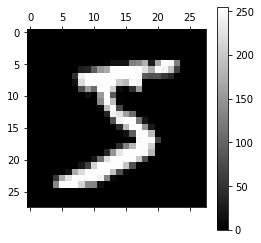

In [3]:
import matplotlib.pyplot as plt

plt.matshow( xtrain_original[0], cmap = 'gray')
plt.colorbar()
plt.show()

In [4]:
# Verify that the corresponding "true" label is correct
print(ytrain_original[0])

5


## Step 3: Reshape and normalize the input
* A 2D CNN model will accept a 4D input data - \[number of data, height, width, depth of image]
* So, we will reshape each image of dimension \[28, 28] to \[28, 28, 1] 
* Also, the image intensities can be anywhere from 0 to 255 - we want these numbers to be between 0 and 1

In [0]:
# Add an axis to serve as a channel
xtrain = xtrain_original.reshape( ( 60000, 28, 28, 1 ) )
xvalid = xvalid_original.reshape( ( 10000, 28, 28, 1 ) )
# Normalize the inputs
xtrain = xtrain / 255
xvalid = xvalid / 255

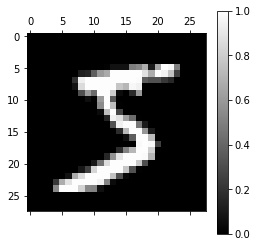

In [6]:
# Verify that normalization worked
plt.matshow( xtrain[0, :, :, 0], cmap = 'gray')
plt.colorbar()
plt.show()

## Step 4: Reformat our labels (one-hot encode them)
* Our network will have 10 output nodes, we need to convert our labels accordingly
* Verify that the shape of train_labels is (60000, 10)

In [7]:
print("Before:")
print( ytrain_original.shape )
print( ytrain_original[0] )

Before:
(60000,)
5


In [0]:
# One-hot encode the output labels
ytrain = tensorflow.keras.utils.to_categorical( ytrain_original )
yvalid = tensorflow.keras.utils.to_categorical( yvalid_original )

In [0]:
print("After:")
print( ytrain.shape )
print( ytrain[0] )

## Step 5: Create a neural network with following architecture:  
* The first layer has 16 filters (kernels), each of size 3x3
* The third layer has 4 filters (kernels), each of size 3x3
* The last layer is a set of 10 neurons - one for each of the 10 digit labels

#### Notes:
* You could use just the Dense layers to achieve digit identification - CNNs usually deliver better accuracy
* Conv2D is the convolutional layer - Conv2D( filters, (filter_height, filter_width), (activation), (input_shape) )
* The filter will move through the image pixel by pixel (or "convolves") around the image picking up values - output of: 26 x 26
* The last layer - 10 neurons for digits between 0 and 9 - Each neuron will contain values be between 0 - 1 and all of the values will sum to 1
* We have a probability for a digit prediction - the highest probability will be the model's prediction for the digit
* Having `sigmoid` in the first layer does not help here because of the normalization technique

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu', input_shape = xtrain[0, :, :, :].shape ) )
model.add( Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 10, activation = 'relu' ) )
model.add( Dense( 10, activation = 'softmax' ) )
model.summary()

## Step 6: Compile and train the model

In [0]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit( xtrain, ytrain, validation_data = (xvalid, yvalid), epochs = 5, batch_size = 64 )

## Step 7: Assess the learning curves

In [0]:
print(history.params)

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

## Step 8: Evaluate the model on the validation set

In [0]:
validation_loss, validation_acc = model.evaluate( xvalid, yvalid )
print( 'validation_acc:', validation_acc )

## Step 9: Check what the model predicts
* An example of what the model has predicted and comparison with the true classes

In [0]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

print( yvalid[0] )
plt.matshow( xvalid[0, :, :, 0], cmap = 'gray' )
plt.show()

* Visualizing the predictions predictions on the unseen data - this is going to show us how the model is predicting the images
* The output is an array of values where each value is associated to a digit

In [0]:
predictions = model.predict( xvalid )
print( predictions[0] )

In [0]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.7f}".format(x)})
print( predictions[0] )

* After rounding we can see the output of the prediction

In [0]:
print( predictions[0].round() )

## Step 10: How can the model's performance be improved?
- Use GPU for training
- Increase the number of epochs
- Increase the number of filters in the first layer, and subsequent layers
- Add more layers into the neural networks 
- Increase the number of Conv2D layers (i.e. add extra layers)
- What is the baseline accuracy (i.e. accuracy of a random model)?